<a href="https://colab.research.google.com/github/hsantos1985/neural_network/blob/main/APLICACAO_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##APLICAÇÃO REDE NEURAL CONVOLUCIONAL
####O OBJETIVO É CRIAR 3 MODELOS DE PREVISÃO, OS QUAIS CONSIGAM IDENTIFICAR SE UMA IMAGEM É UM TIGRE, LEÃO OU UM GATO.



## Funções auxiliares

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install keras-visualizer

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras_visualizer import visualizer

def plot_img(img_array, plot_axis=False):
    '''
    img_array: é o retorno da função `keras.utils.img_to_array` que retorna o array da imagem considerando o formato RGB
    '''
    img_pil = Image.fromarray(img_array.astype('uint8'))
    if plot_axis:
        return plt.imshow(img_pil)
    return img_pil


def plot_nn(model, settings={}):
    visualizer(model, file_name='/tmp/output', file_format='png', view=True, settings=settings)
    img = Image.open('/tmp/output.png')
    return img

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(history.history['loss'], 'r-', label='train loss')
    ax1.plot(history.history['val_loss'], 'b--', label='test loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax1.legend()

    ax2.plot(history.history['accuracy'], 'r-', label='train acc')
    ax2.plot(history.history['val_accuracy'], 'b--', label='test acc')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()


def plot_random_imgs(df, rows=2, columns=5, figsize=(8, 4), show_predictions=False):
    fig, axs = plt.subplots(rows, columns, figsize=figsize)

    idx_img = list(np.random.choice(list(df.index), rows*columns, replace=False))
    print(idx_img)
    for i, ax in enumerate(axs.flat):
        title = f'{df.target.iloc[idx_img[i]]}'

        if show_predictions and 'predicted_class' in df.columns:
            title = title + f' | Pred:{df.predicted_class.iloc[idx_img[i]]} ( {df.target_proba.iloc[idx_img[i]]:.3f})'

        ax.imshow(plt.imread(df.full_path.iloc[idx_img[i]]))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()

##1-OBTENÇÃO DOS DADOS - IMAGENS

In [5]:
#OBTENÇÃO DAS IMAGENS NOS DIRETÓRIOS
import glob

IMGS_DIR = '/content/drive/MyDrive/datasets-dl/felinos'

image_files = glob.glob(f"{IMGS_DIR}/**/*.*", recursive=True)

In [ ]:
# 1. Carregar a imagem
# 2. Fazer o resize
# 3. Converter para array
# 4. Normalizar

###2 - CRIAÇÃO DA BASE ABT

In [6]:
import pandas as pd
dados = pd.DataFrame(image_files, columns=['full_path'])
dados.head()

,full_path
0,/content/drive/MyDrive/datasets-dl/felinos/lea...
1,/content/drive/MyDrive/datasets-dl/felinos/lea...
2,/content/drive/MyDrive/datasets-dl/felinos/lea...
3,/content/drive/MyDrive/datasets-dl/felinos/lea...
4,/content/drive/MyDrive/datasets-dl/felinos/lea...


In [7]:
dados.shape

(383, 1)

In [8]:
#CRIAÇÃO DAS COLUNAS
dados['target']=dados.full_path.apply(lambda dir:dir.split('/')[-2])
dados['filename']=dados.full_path.apply(lambda dir:dir.split('/')[-1])
dados['extension']=dados.full_path.apply(lambda dir:dir.split('.')[-1])

In [9]:
dados.head(3)

,full_path,target,filename,extension
0,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_11.jpg,jpg
1,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_13_2.jpg,jpg
2,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_1.jpg,jpg


In [10]:
dados.value_counts()

full_path                                                        target  filename        extension
/content/drive/MyDrive/datasets-dl/felinos/gato/Cat_1.jpeg       gato    Cat_1.jpeg      jpeg         1
/content/drive/MyDrive/datasets-dl/felinos/leao/Lion_9_2.jpg     leao    Lion_9_2.jpg    jpg          1
/content/drive/MyDrive/datasets-dl/felinos/tigre/Tiger_11_3.jpg  tigre   Tiger_11_3.jpg  jpg          1
/content/drive/MyDrive/datasets-dl/felinos/tigre/Tiger_11_2.jpg  tigre   Tiger_11_2.jpg  jpg          1
/content/drive/MyDrive/datasets-dl/felinos/tigre/Tiger_11_1.jpg  tigre   Tiger_11_1.jpg  jpg          1
                                                                                                     ..
/content/drive/MyDrive/datasets-dl/felinos/leao/Lion_10_1.jpg    leao    Lion_10_1.jpg   jpg          1
/content/drive/MyDrive/datasets-dl/felinos/leao/Lion_10.jpeg     leao    Lion_10.jpeg    jpeg         1
/content/drive/MyDrive/datasets-dl/felinos/leao/Lion_1.jpg       leao

###3- SEPARAÇÃO DA BASE EM TREINO E TESTE

In [11]:
#SEPARAÇÃO D ABASE DE TESTE E TREINO EM 45% PARA TESTE E 55% PARA TREINO
from sklearn.model_selection import train_test_split

dados_train, dados_test = train_test_split(dados, test_size=0.45, stratify=dados.target)

In [12]:
dados.target.value_counts()

target
leao     131
tigre    129
gato     123
Name: count, dtype: int64

In [13]:
dados_train['type_dataset']='train'
dados_test['type_dataset']='test'

In [14]:
dados_train

,full_path,target,filename,extension,type_dataset
248,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_8_4.jpg,jpg,train
355,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_6_1.jpg,jpg,train
93,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_3_2.jpg,jpg,train
194,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_29_2.jpg,jpg,train
88,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_9_3.jpg,jpg,train
...,...,...,...,...,...
287,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_17_1.jpg,jpg,train
171,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_16_3.jpg,jpg,train
360,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_26_1.jpg,jpg,train
80,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_18_3.jpg,jpg,train


In [15]:
dados_test

,full_path,target,filename,extension,type_dataset
157,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_22_1.jpg,jpg,test
341,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_26_3.jpg,jpg,test
210,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_7_1.jpg,jpg,test
67,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_27_2.jpg,jpg,test
79,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_24_3.jpg,jpg,test
...,...,...,...,...,...
299,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_20_3.jpg,jpg,test
90,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_3_1.jpg,jpg,test
312,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_22_3.jpg,jpg,test
260,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_18_1.jpg,jpg,test


In [16]:
#junção dos dados de treino e teste
dados=pd.concat([dados_train,dados_test])

In [17]:
dados.head(10)

,full_path,target,filename,extension,type_dataset
248,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_8_4.jpg,jpg,train
355,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_6_1.jpg,jpg,train
93,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_3_2.jpg,jpg,train
194,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_29_2.jpg,jpg,train
88,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_9_3.jpg,jpg,train
38,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_1_1.jpg,jpg,train
251,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_8_2.jpg,jpg,train
153,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_12_3.jpg,jpg,train
29,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_14.jpeg,jpeg,train
65,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_24_4.jpg,jpg,train


In [18]:
#proporção dos dados de treino e teste na base geral
dados.value_counts(['type_dataset', 'target']).to_frame()/len(dados)

count
type_dataset target          
train        leao    0.187990
             tigre   0.185379
             gato    0.174935
test         leao    0.154047
             tigre   0.151436
             gato    0.146214

In [19]:
#dados absolutos de treino e teste na base geral
dados.value_counts(['type_dataset', 'target']).to_frame()

count
type_dataset target       
train        leao       72
             tigre      71
             gato       67
test         leao       59
             tigre      58
             gato       56

###4 - VERIFICAÇÃO DAS IMAGENS NO DF

In [20]:
dados['full_path'].iloc[2]

'/content/drive/MyDrive/datasets-dl/felinos/leao/Lion_3_2.jpg'

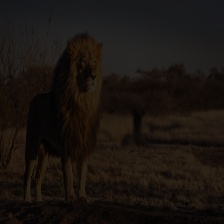

In [21]:
#Verificando as imagens no dataframe
from keras.utils import load_img

img = load_img(dados['full_path'].iloc[2])
img

In [22]:
#tamanho da imagem
img.size

(224, 224)

In [23]:
#criação de função para plotar as imagens aleatórias de um df
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras_visualizer import visualizer

def plot_random_imgs(df, rows=2, columns=5, figsize=(8, 4), show_predictions=False):
    fig, axs = plt.subplots(rows, columns, figsize=figsize)

    idx_img = list(np.random.choice(list(df.index), rows*columns, replace=False))
    print(idx_img)
    for i, ax in enumerate(axs.flat):
        title = f'{df.target.iloc[idx_img[i]]}'

        if show_predictions and 'predicted_class' in df.columns:
            title = title + f' | Pred:{df.predicted_class.iloc[idx_img[i]]} ( {df.target_proba.iloc[idx_img[i]]:.3f})'

        ax.imshow(plt.imread(df.full_path.iloc[idx_img[i]]))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()

[216, 104, 278, 77, 346, 326, 279, 218, 208, 70]


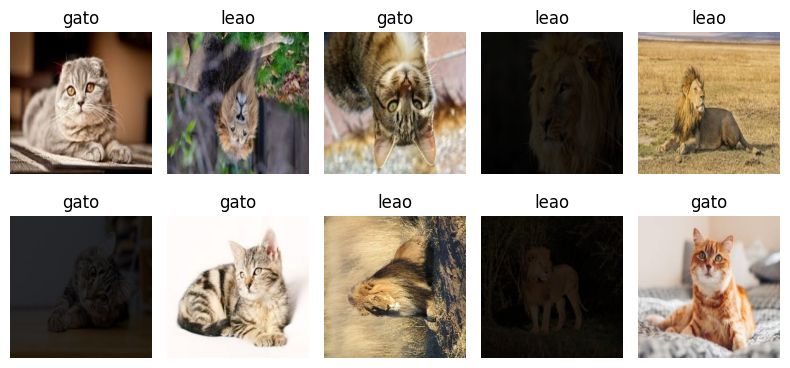

In [24]:
#plotando imagens aleatórias do df
plot_random_imgs(dados)

###5 - FAZENDO A NORMALIZAÇÃO E RESIZE DAS IMAGENS

In [25]:
#CRIANDO UMA FUNÇÃO PARA FAZER O RESIZE DAS IMAGENS E NORMALIZAÇÃO DELAS
#DEIXANDO A IMAGEM 32 X 32
from keras.utils import img_to_array, load_img

def resize_convert_to_array(full_path, img_size=(32, 32)):
    try:
        return img_to_array(load_img(full_path).resize(img_size)) / 255
    except Exception as e:
        print(e)
        return np.array([])

In [26]:
#APLICANDO A FUNÇÃO PARA AS IMAGENS DOS DADOS DE TREINO E TESTE
from tqdm import tqdm

new_imgs_size = (32, 32)

imgs_train = []
targets_train = []

imgs_test = []
targets_test = []

import time
for line in tqdm(dados.itertuples(), total=dados.shape[0]):
    #print(line.full_path)
    if line.type_dataset == 'train':
        aux_array = resize_convert_to_array(line.full_path, new_imgs_size)
        if len(aux_array) == 0:
            dados.loc[line.Index, 'img_processada'] = False
        else:
            imgs_train.append(aux_array)
            targets_train.append(line.target)
            dados.loc[line.Index, 'img_processada'] = True
    elif line.type_dataset == 'test':
        aux_array = resize_convert_to_array(line.full_path, new_imgs_size)
        if len(aux_array) == 0:
            dados.loc[line.Index, 'img_processada'] = False
        else:
            imgs_test.append(aux_array)
            targets_test.append(line.target)
            dados.loc[line.Index, 'img_processada'] = True

100%|██████████| 383/383 [04:21<00:00,  1.47it/s]


###6 - CRIAÇÃO E PROCESSAMENTO DAS VARIÁVEIS DE TREINO E TESTE

In [27]:
#INSERINDO AS IMAGENS TRANSFORMADAS NAS VARIÁVEIS DE TREINO E TESTE
X_train = np.array(imgs_train)
y_train = np.array(targets_train)

X_test = np.array(imgs_test)
y_test = np.array(targets_test)

In [28]:
#FUNÇÃO PARA SALVAR E CARREGAR AS IMAGENS NOS DIRETÓRIOS ESCOLHIDOS
import joblib
def save_obj(obj, full_path):
    try:
        joblib.dump(obj, full_path)
    except Exception as e:
        print(e)

def load_obj(full_path):
    try:
        obj = joblib.load(full_path)
        return obj
    except Exception as e:
        print(e)

In [30]:
#ESTABELECENDO O DIRETÓIO PARA SALVA AS IMAGENS
!mkdir -p /content/drive/MyDrive/datasets-dl-serializados/felinos

In [31]:
#SALVANDO AS IMAGENS TRANSFORMADAS NAS PASTAS
save_obj(X_train, '/content/drive/MyDrive/datasets-dl-serializados/felinos/X_train.joblib')
save_obj(X_test, '/content/drive/MyDrive/datasets-dl-serializados/felinos/X_test.joblib')
save_obj(y_train, '/content/drive/MyDrive/datasets-dl-serializados/felinos/y_train.joblib')
save_obj(y_test, '/content/drive/MyDrive/datasets-dl-serializados/felinos/y_test.joblib')

In [32]:
#ESTABELECIMENTO DAS IMAGENS PARA AS VARIÁVEIS DE TREINO E TESTE
X_train = load_obj('/content/drive/MyDrive/datasets-dl-serializados/felinos/X_train.joblib')
X_test = load_obj('/content/drive/MyDrive/datasets-dl-serializados/felinos/X_test.joblib')
y_train = load_obj('/content/drive/MyDrive/datasets-dl-serializados/felinos/y_train.joblib')
y_test = load_obj('/content/drive/MyDrive/datasets-dl-serializados/felinos/y_test.joblib')

In [35]:
#X TREINO EM FORATO DE ARRAY E COM OS DADOS NORMALIZADOS
X_train

array([[[[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        ...,

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216]

In [36]:
X_train[:4]

array([[[[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        ...,

        [[1.        , 0.9843137 , 0.98039216],
         [1.        , 0.9843137 , 0.98039216]

In [37]:
y_train[:4]

array(['gato', 'tigre', 'leao', 'gato'], dtype='<U5')

In [38]:
#VERIFICAÇÃO DA QUANTIDADE DE CLASSES
np.unique(y_train).size

3

In [39]:
#CRIANDO UMA VARIÁVEL DE NÚMERO DE CLASSES
n_classes=np.unique(y_train).size

In [40]:
#PROCESSAMENTO DAS IMAGENS - COLOCANDO O ENCONDER NO TARGET DE TREINO E TEST
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encoder = le.fit_transform(y_train)
y_test_encoder = le.transform(y_test)

from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train_encoder, n_classes)
y_test_categorical = to_categorical(y_test_encoder, n_classes)

In [41]:
y_train_categorical[:3]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

###6 - CRIAÇÃO DOS MODELOS

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras_visualizer import visualizer

In [43]:
#formato das variáveis e número de classes
input_shape = X_train[0].shape
input_shape, n_classes

((32, 32, 3), 3)

##Modelo1
####rede convolucional com a seguinte estrutura:

    - 4 Camada Conv2D
    - 1 Camada MaxPooling2D
    - 1 Camada Flatten
    - 1 Camada Densa
- Utilização do otimizador adam e a métrica de acuracidade
- Treino por 50 épocas e batch_size=32


In [45]:
#modelo1
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=100, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 100)       57700     
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        28832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                      

In [46]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.regularizers import L1, L2, L1L2

In [47]:
#OTIMIZADOR DO MODELO PERDA E MÉTRICA
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [48]:
X_train.shape

(210, 32, 32, 3)

In [49]:
#APLICAÇÃO DO MODELO NA BASE DE TREINO E TESTE
historico = model.fit(
        X_train,
        y_train_categorical,
        batch_size=32,
        epochs=150,
        verbose=1,
        validation_data=(X_test, y_test_categorical)
    )


Epoch 1/150
7/7 [==============================] - 7s 163ms/step - loss: 1.1423 - accuracy: 0.3429 - val_loss: 1.1001 - val_accuracy: 0.3353
Epoch 2/150
7/7 [==============================] - 0s 13ms/step - loss: 1.1004 - accuracy: 0.3381 - val_loss: 1.0943 - val_accuracy: 0.3468
Epoch 3/150
7/7 [==============================] - 0s 13ms/step - loss: 1.0911 - accuracy: 0.3571 - val_loss: 1.0800 - val_accuracy: 0.4798
Epoch 4/150
7/7 [==============================] - 0s 13ms/step - loss: 1.0605 - accuracy: 0.5143 - val_loss: 1.0486 - val_accuracy: 0.4855
Epoch 5/150
7/7 [==============================] - 0s 15ms/step - loss: 1.0807 - accuracy: 0.5238 - val_loss: 1.0325 - val_accuracy: 0.4913
Epoch 6/150
7/7 [==============================] - 0s 13ms/step - loss: 1.0367 - accuracy: 0.5095 - val_loss: 1.0484 - val_accuracy: 0.5029
Epoch 7/150
7/7 [==============================] - 0s 14ms/step - loss: 1.0034 - accuracy: 0.5476 - val_loss: 0.9957 - val_accuracy: 0.5087
Epoch 8/150
7/7 [==

In [50]:
#CRIAÇÃO DE FUNÇÃO PARAR PLOTAR OS GRÁFICOS DE PERDA E ACURÁCIA DO MODELO
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(history.history['loss'], 'r-', label='train loss')
    ax1.plot(history.history['val_loss'], 'b--', label='test loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax1.legend()

    ax2.plot(history.history['accuracy'], 'r-', label='train acc')
    ax2.plot(history.history['val_accuracy'], 'b--', label='test acc')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()

###Análise modelo1

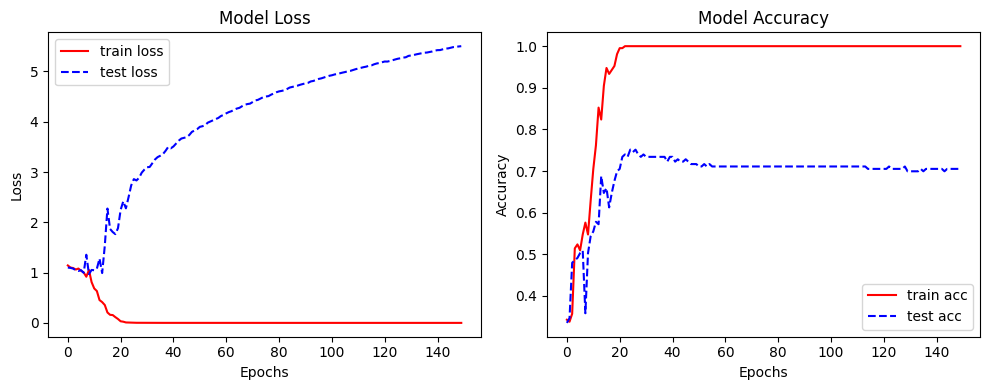

In [51]:
plot_history(historico)

In [52]:
#O MODELO ESTÁ OVERFITTANDO O VALOR DA ACURÁCIA DO TREINO É BEM MAIOR QUE O DE TESTE
#A PERDA DO TESTE É MUITO MAIOR

In [ ]:
model.evaluate(X_test, y_test_categorical)

6/6 [==============================] - 0s 6ms/step - loss: 4.6328 - accuracy: 0.7110


[4.632794380187988, 0.7109826803207397]

In [53]:
#FAZENDO AS PREDIÇÕES NA BASE DE TESTE
predictions = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [54]:
#CODIFICANDO AS CATEGORIAS DO TARGET
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1])

In [55]:
#FILTRANDO OS DADOS DE TESTE
dados_test = dados[dados['type_dataset'] == 'test'].copy().reset_index(drop=True)

In [56]:
#RECODIFICANDO OS DADOS PREDITOS DA BASE DE TESTE
dados_test['predicted_class'] = le.inverse_transform(predicted_classes)

In [57]:
#CRIANDO AS COLUNAS DE PROBABILIDADE
dados_test['target_proba'] = np.max(predictions, axis=1)

In [58]:
dados_test.head(3)

,full_path,target,filename,extension,type_dataset,img_processada,predicted_class,target_proba
0,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_22_1.jpg,jpg,test,True,gato,1.000000
1,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_26_3.jpg,jpg,test,True,tigre,0.999473
2,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_7_1.jpg,jpg,test,True,tigre,0.999893


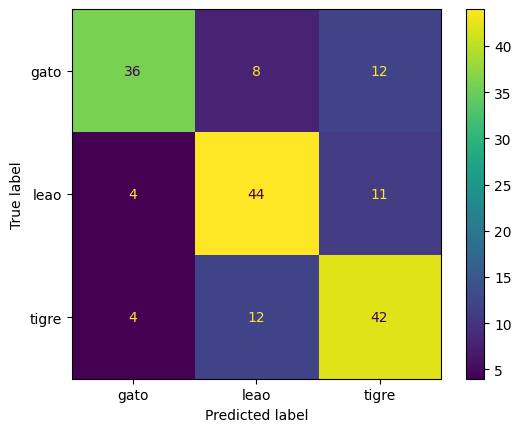

In [59]:
#APLICANDO A MATRIZ DE CONFUSÃO
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(dados_test['target'], dados_test['predicted_class'])

In [60]:
#BAIXANDO AS BIBLIOTECAS PARA AS MTERICAS DO MODELO
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [61]:
#OBTENDO AS MTERICAS DO MODELO
y_true = dados_test['target']
y_pred = dados_test['predicted_class']


#setando as classes do target
classes = sorted(list(set(y_true)))


#transformando os dados para calcular a curva Roc
y_true_b = label_binarize(y_true, classes=classes)
y_pred_b = label_binarize(y_pred, classes=classes)


metricas = {
    'accuracy': accuracy_score(y_true, y_pred),
    'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred,average='weighted'),
    'recall': recall_score(y_true, y_pred,average='weighted'),
    'f1_score': f1_score(y_true, y_pred,average='weighted'),
    'rocauc': roc_auc_score(y_true_b, y_pred_b,average='weighted',multi_class='ovr')

}

metricas_df=pd.DataFrame(list(metricas.items()),columns=['Métricas','Score'])
metricas_df

,Métricas,Score
0,accuracy,0.705202
1,balanced_accuracy,0.704253
2,precision,0.715940
3,recall,0.705202
4,f1_score,0.706018
5,rocauc,0.778093


In [62]:
#verificando as diferenças entre os valores preditos e verdadeiros
df_diff = dados_test[dados_test['target'] != dados_test['predicted_class']].copy().reset_index(drop=True)
df_diff.head(13)

,full_path,target,filename,extension,type_dataset,img_processada,predicted_class,target_proba
0,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_7_1.jpg,jpg,test,True,tigre,0.999893
1,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_27_2.jpg,jpg,test,True,tigre,0.999995
2,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_16_3.jpg,jpg,test,True,tigre,0.658664
3,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_24.jpeg,jpeg,test,True,tigre,1.000000
4,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_12_1.jpg,jpg,test,True,gato,0.988093
5,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_19_4.jpg,jpg,test,True,gato,1.000000
6,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_29_1.jpg,jpg,test,True,leao,1.000000
7,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_6_3.jpg,jpg,test,True,tigre,0.999997
8,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_28_2.jpg,jpg,test,True,leao,1.000000
9,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_29.jpeg,jpeg,test,True,leao,0.598412


[33, 32, 19, 42, 48, 46, 15, 6, 36, 35]


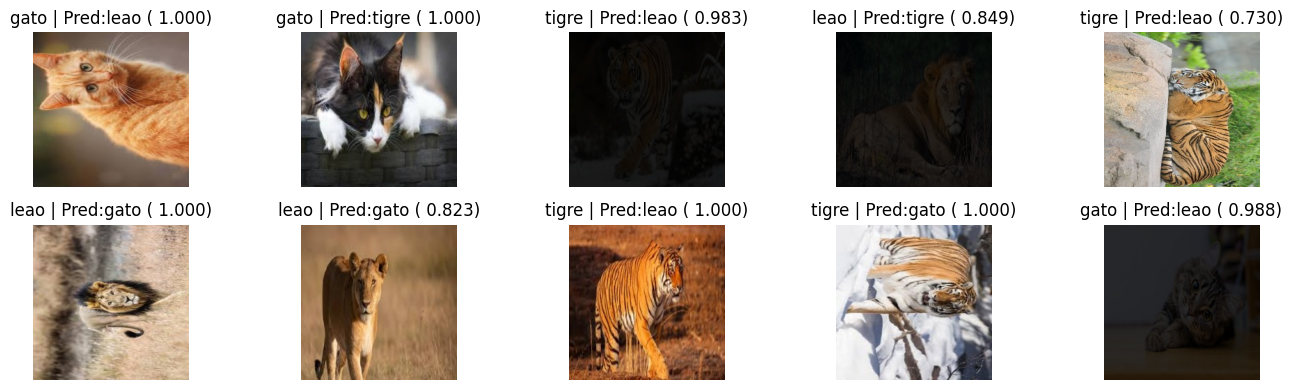

In [63]:
#PLOTANDO AS IMAGENS RESULTANDO E COMPARANDO O MODELO COM O REAL
plot_random_imgs(df_diff, 2, 5, show_predictions=True, figsize=(14, 4))

###Conclusão Modelo1
####O modelo 1 está overfittando apesar de ter uma acurácia, razoável, de 73% e curva roc de 0,77 a diferença entre as performances de teste e treino é grande

##Modelo2
####Simplificando a aquitetura do modelo:

    - 1 Camada Conv2D
    - 1 Camada MaxPooling2D
    - 1 Camada Flatten
    - 1 Camada Densa
    - Utilização do L2 para redução uniforme dos pesos
- Utilização do otimizador adam e a métrica de acuracidade
- Treino por 50 épocas e batch_size=32


In [64]:
#modelo2
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape,strides=(1,1), padding='same',
    kernel_regularizer=L2()))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2097280   
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2099459 (8.01 MB)
Trainable params: 2099459 (8.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [65]:
#COMPILANDO O MODELO
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')

In [66]:
  #APLICANDO O MODELO 2 NAS BASES DE TREINO E TESTE
  historico2 = model2.fit(
        X_train,
        y_train_categorical,
        batch_size=32,
        epochs=300,
        verbose=1,
        validation_data=(X_test, y_test_categorical)
    )

Epoch 1/300
7/7 [==============================] - 3s 78ms/step - loss: 1.3858 - accuracy: 0.3476 - val_loss: 1.1396 - val_accuracy: 0.3237
Epoch 2/300
7/7 [==============================] - 0s 14ms/step - loss: 1.1204 - accuracy: 0.4095 - val_loss: 1.0792 - val_accuracy: 0.5723
Epoch 3/300
7/7 [==============================] - 0s 14ms/step - loss: 1.0037 - accuracy: 0.5810 - val_loss: 1.0121 - val_accuracy: 0.5145
Epoch 4/300
7/7 [==============================] - 0s 22ms/step - loss: 0.9170 - accuracy: 0.6381 - val_loss: 0.9821 - val_accuracy: 0.6127
Epoch 5/300
7/7 [==============================] - 0s 15ms/step - loss: 0.8395 - accuracy: 0.6905 - val_loss: 1.1871 - val_accuracy: 0.4220
Epoch 6/300
7/7 [==============================] - 0s 18ms/step - loss: 0.7725 - accuracy: 0.7000 - val_loss: 0.9508 - val_accuracy: 0.5780
Epoch 7/300
7/7 [==============================] - 0s 17ms/step - loss: 0.6984 - accuracy: 0.7571 - val_loss: 0.8821 - val_accuracy: 0.7283
Epoch 8/300
7/7 [===

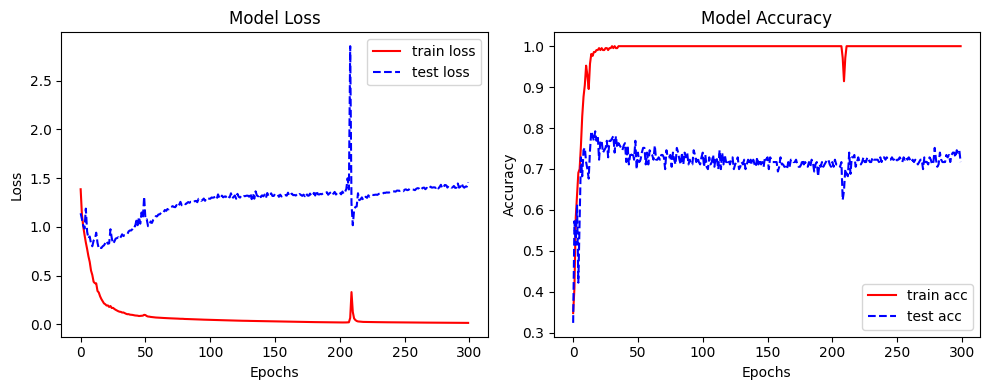

In [67]:
plot_history(historico2)

In [68]:
#APESAR DA SIMPLIFICAÇÃO DA REDE E APLICAÇÃO DA L2 PARA SIMPLIFICAÇÃO DOS PESOS
#O MODELO AINDA ESTÁ OVERFITTANDO

##Modelo3


In [70]:
#APLICANDO A FUNÇÃO PARA AS IMAGENS DOS DADOS DE TREINO E TESTE
#UTILIZANDO IMAGEM COM 124 X 124 PIXELS
from tqdm import tqdm

new_imgs_size = (124, 124)

imgs_train2 = []
targets_train2 = []

imgs_test2 = []
targets_test2 = []

import time
for line in tqdm(dados.itertuples(), total=dados.shape[0]):
    #print(line.full_path)
    if line.type_dataset == 'train':
        aux_array = resize_convert_to_array(line.full_path, new_imgs_size)
        if len(aux_array) == 0:
            dados.loc[line.Index, 'img_processada'] = False
        else:
            imgs_train2.append(aux_array)
            targets_train2.append(line.target)
            dados.loc[line.Index, 'img_processada'] = True
    elif line.type_dataset == 'test':
        aux_array = resize_convert_to_array(line.full_path, new_imgs_size)
        if len(aux_array) == 0:
            dados.loc[line.Index, 'img_processada'] = False
        else:
            imgs_test2.append(aux_array)
            targets_test2.append(line.target)
            dados.loc[line.Index, 'img_processada'] = True

100%|██████████| 383/383 [00:02<00:00, 170.07it/s]


In [71]:
#INSERINDO AS IMAGENS TRANSFORMADAS NAS VARIÁVEIS DE TREINO E TESTE
X_train2 = np.array(imgs_train2)
y_train2 = np.array(targets_train2)

X_test2 = np.array(imgs_test2)
y_test2 = np.array(targets_test2)

In [ ]:
#FUNÇÃO PARA SALVAR E CARREGAR AS IMAGENS NOS DIRETÓRIOS ESCOLHIDOS
import joblib
def save_obj(obj, full_path):
    try:
        joblib.dump(obj, full_path)
    except Exception as e:
        print(e)

def load_obj(full_path):
    try:
        obj = joblib.load(full_path)
        return obj
    except Exception as e:
        print(e)

In [72]:
#SALVANDO AS IMAGENS TRANSFORMADAS NAS PASTAS
save_obj(X_train2, '/content/drive/MyDrive/datasets-dl-serializados/felinos/X_train2.joblib')
save_obj(X_test2, '/content/drive/MyDrive/datasets-dl-serializados/felinos/X_test2.joblib')
save_obj(y_train2, '/content/drive/MyDrive/datasets-dl-serializados/felinos/y_train2.joblib')
save_obj(y_test2, '/content/drive/MyDrive/datasets-dl-serializados/felinos/y_test2.joblib')

In [78]:
#formato das variáveis e número de classes
input_shape2 = X_train2[0].shape
input_shape2, n_classes

((124, 124, 3), 3)

In [73]:
#PROCESSAMENTO DAS IMAGENS - COLOCANDO O ENCONDER NO TARGET DE TREINO E TEST
#NÚMERO DE CLASSES CONTINUA O MESMO
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encoder2 = le.fit_transform(y_train2)
y_test_encoder2 = le.transform(y_test2)

from keras.utils import to_categorical

y_train_categorical2 = to_categorical(y_train_encoder2, n_classes)
y_test_categorical2 = to_categorical(y_test_encoder2, n_classes)

#UTILIZAÇÃO DA MESMA ESTRUTURA DO MODELO 2
    - 1 Camada Conv2D
    - 1 Camada MaxPooling2D
    - 1 Camada Flatten
    - 1 Camada Densa
    - Utilização do L2 para redução uniforme dos pesos
- Utilização do otimizador adam e a métrica de acuracidade
- Treino por 50 épocas e batch_size=32

In [79]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape2,strides=(1,1), padding='same',
    kernel_regularizer=L2()))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(n_classes, activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               31490176  
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 31492355 (120.13 MB)
Trainable params: 31492355 (120.13 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [80]:
#COMPILANDO O MODELO
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')

In [81]:
  #APLICANDO O MODELO 2 NAS BASES DE TREINO E TESTE
  historico3 = model3.fit(
        X_train2,
        y_train_categorical2,
        batch_size=32,
        epochs=300,
        verbose=1,
        validation_data=(X_test2, y_test_categorical2)
    )

Epoch 1/300
7/7 [==============================] - 2s 100ms/step - loss: 9.2815 - accuracy: 0.3619 - val_loss: 6.1156 - val_accuracy: 0.3237
Epoch 2/300
7/7 [==============================] - 0s 32ms/step - loss: 3.0481 - accuracy: 0.3667 - val_loss: 1.0075 - val_accuracy: 0.5780
Epoch 3/300
7/7 [==============================] - 0s 31ms/step - loss: 0.9541 - accuracy: 0.6143 - val_loss: 0.8435 - val_accuracy: 0.6763
Epoch 4/300
7/7 [==============================] - 0s 34ms/step - loss: 0.6445 - accuracy: 0.8095 - val_loss: 0.8897 - val_accuracy: 0.6069
Epoch 5/300
7/7 [==============================] - 0s 32ms/step - loss: 0.5231 - accuracy: 0.8667 - val_loss: 0.7232 - val_accuracy: 0.7457
Epoch 6/300
7/7 [==============================] - 0s 31ms/step - loss: 0.3635 - accuracy: 0.9429 - val_loss: 0.6822 - val_accuracy: 0.7052
Epoch 7/300
7/7 [==============================] - 0s 31ms/step - loss: 0.2703 - accuracy: 0.9667 - val_loss: 0.6808 - val_accuracy: 0.7688
Epoch 8/300
7/7 [==

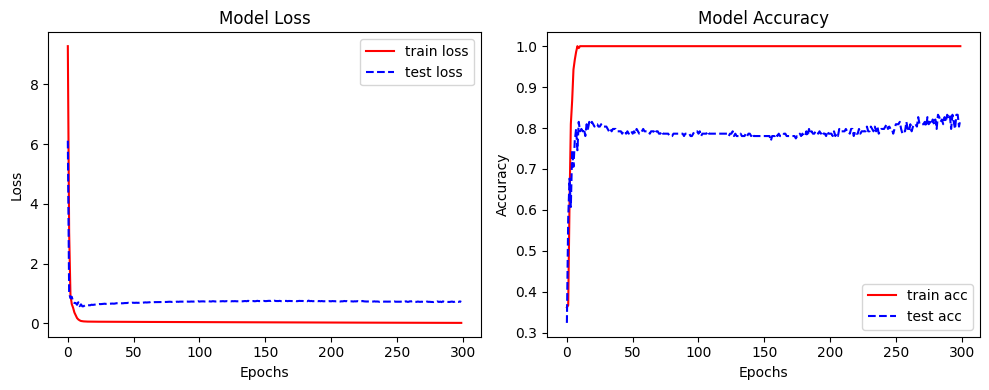

In [82]:
plot_history(historico3)

In [83]:
#AO AUMENTAR A IMAGEM PARA 124 x 124 PIXELS, ERIFICA-SE O MODELO 3, IGUAL AO 2 OBTEE MELHORAS
#ELE NÃO ESTÁ OERFITTANDO E HOUE AUENTO DA ACURÁCIA
#APESAR DISSO, A ACURÁCIA DE TESTE AINDA ESTÁ ABAIXO DA DE TESTE

In [85]:
#FAZENDO AS PREDIÇÕES NA BASE DE TESTE2
predictions2 = model3.predict(X_test2)

6/6 [==============================] - 0s 7ms/step


In [86]:
#CODIFICANDO AS CATEGORIAS DO TARGET
predicted_classes2 = np.argmax(predictions2, axis=1)
predicted_classes2

array([0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0])

In [88]:
#FILTRANDO OS DADOS DE TESTE
dados_test2 = dados[dados['type_dataset'] == 'test'].copy().reset_index(drop=True)

In [89]:
#RECODIFICANDO OS DADOS PREDITOS DA BASE DE TESTE
dados_test2['predicted_class'] = le.inverse_transform(predicted_classes2)

In [90]:
#CRIANDO AS COLUNAS DE PROBABILIDADE
dados_test2['target_proba'] = np.max(predictions2, axis=1)

In [91]:
dados_test2.head(3)

,full_path,target,filename,extension,type_dataset,img_processada,predicted_class,target_proba
0,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_22_1.jpg,jpg,test,True,gato,0.898489
1,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_26_3.jpg,jpg,test,True,tigre,0.744508
2,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_7_1.jpg,jpg,test,True,gato,0.990623


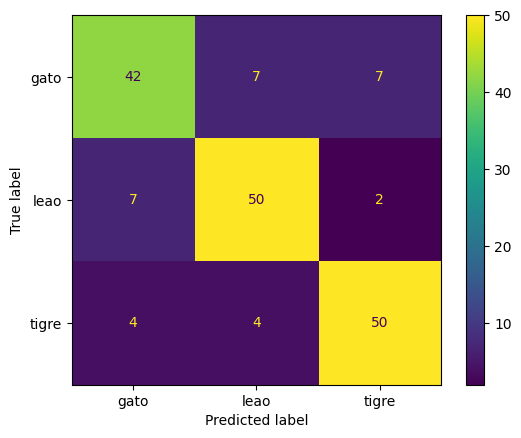

In [92]:
#APLICANDO A MATRIZ DE CONFUSÃO
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(dados_test2['target'], dados_test2['predicted_class'])

In [ ]:
#BAIXANDO AS BIBLIOTECAS PARA AS MTERICAS DO MODELO
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [93]:
#OBTENDO AS MTERICAS DO MODELO
y_true2 = dados_test2['target']
y_pred2 = dados_test2['predicted_class']


#setando as classes do target
classes2 = sorted(list(set(y_true2)))


#transformando os dados para calcular a curva Roc
y_true_b2 = label_binarize(y_true2, classes=classes2)
y_pred_b2 = label_binarize(y_pred2, classes=classes2)


metricas = {
    'accuracy': accuracy_score(y_true2, y_pred2),
    'balanced_accuracy': balanced_accuracy_score(y_true2, y_pred2),
    'precision': precision_score(y_true2, y_pred2,average='weighted'),
    'recall': recall_score(y_true2, y_pred2,average='weighted'),
    'f1_score': f1_score(y_true2, y_pred2,average='weighted'),
    'rocauc': roc_auc_score(y_true_b2, y_pred_b2,average='weighted',multi_class='ovr')

}

metricas_df2=pd.DataFrame(list(metricas.items()),columns=['Métricas','Score'])
metricas_df2

,Métricas,Score
0,accuracy,0.820809
1,balanced_accuracy,0.819842
2,precision,0.820177
3,recall,0.820809
4,f1_score,0.820204
5,rocauc,0.865615


In [94]:
#verificando as diferenças entre os valores preditos e verdadeiros
df_diff2 = dados_test2[dados_test2['target'] != dados_test2['predicted_class']].copy().reset_index(drop=True)
df_diff2.head(13)

,full_path,target,filename,extension,type_dataset,img_processada,predicted_class,target_proba
0,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_12_1.jpg,jpg,test,True,gato,0.934447
1,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_21_3.jpg,jpg,test,True,tigre,0.512902
2,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_17_3.jpg,jpg,test,True,leao,0.682595
3,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_10_2.jpg,jpg,test,True,gato,0.562252
4,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_6_3.jpg,jpg,test,True,tigre,0.867885
5,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_9_2.jpg,jpg,test,True,leao,0.746634
6,/content/drive/MyDrive/datasets-dl/felinos/lea...,leao,Lion_11_3.jpg,jpg,test,True,gato,0.552574
7,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_23_2.jpg,jpg,test,True,tigre,0.952833
8,/content/drive/MyDrive/datasets-dl/felinos/tig...,tigre,Tiger_29_3.jpg,jpg,test,True,leao,0.999688
9,/content/drive/MyDrive/datasets-dl/felinos/gat...,gato,Cat_10_4.jpg,jpg,test,True,tigre,0.875941


[18, 11, 1, 23, 13, 22, 14, 4, 5, 2]


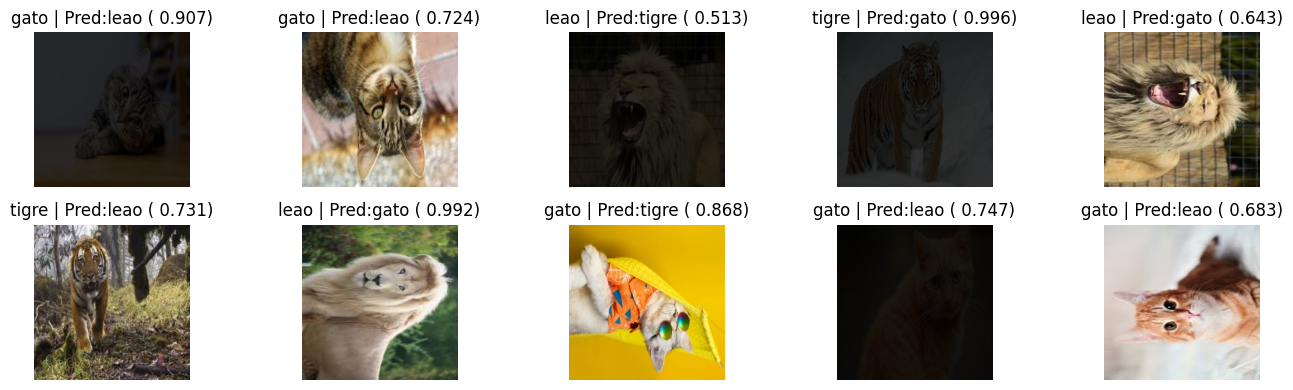

In [95]:
#PLOTANDO AS IMAGENS RESULTANDO E COMPARANDO O MODELO COM O REAL
plot_random_imgs(df_diff2, 2, 5, show_predictions=True, figsize=(14, 4))

In [ ]:
#O MODELO 3 OBTEE ACURÁCIA DE 82% E A CURA ROC TEE VALOR DE 0,86
#O MODELO AINDA TEVE DIFICULDADES PARA DETECTAR FIGURAS ROTACIONADAS
#APESAR DISSO, O MODELO 3 OBTEEV MELHORIAS COM A ALTERAÇÃO DAS IMAGENS

#CONCLUSÃO
####CONCLUI-SE QUE:
Ao aplicar 3 modelos para previsão de imagens de 3 classes(leão, tigre e gato) o modelo 3 obtee os melhores resultados.
Esta melhoria de resultados se deve ao aumento da imagem, que era de 32X32 parar 124X124 pixels.
Com este aumento, o modelo conseguiu obter mais parâmetros e consequentemente ter indicadores melhores, como uma acurácia de 83% ante 70%